# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt
import skimage.io
import scipy.ndimage

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

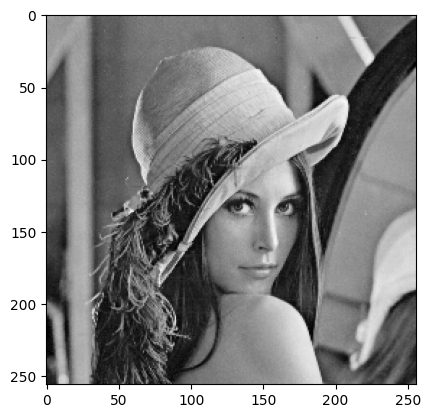

In [2]:
lena = plt.imread('data/lena.png')
plt.imshow(lena, 'gray')

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [3]:
def prewitt_h(img):
    result = numpy.zeros(img.shape)
    n = 1
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if p[0] >= n and p[1] < img.shape[1]-n and p[0] < img.shape[0]-n and p[1] >= n:
            for q in numpy.ndindex(3,3):
                if q[1] == 0:
                    neighborhood_sum -= img[p[0] + q[0] - n, p[1] + q[1] -n]
                elif q[1] == 2:
                    neighborhood_sum += img[p[0] + q[0] - n, p[1] + q[1] -n]
            mean = neighborhood_sum/ 6
            result[p] = mean   
    return result
def prewitt_v(img):
    result = numpy.zeros(img.shape)
    n = 1
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if p[0] >= n and p[1] < img.shape[1]-n and p[0] < img.shape[0]-n and p[1] >= n:
            for q in numpy.ndindex(3,3):
                if q[0] == 0:
                    neighborhood_sum -= img[p[0] + q[0] - n, p[1] + q[1] -n]
                elif q[0] == 2:
                    neighborhood_sum += img[p[0] + q[0] - n, p[1] + q[1] -n]
            mean = neighborhood_sum/ 6
            result[p] = mean
    return result

In [4]:
for q in numpy.ndindex(3,3):
    print(q)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)


**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

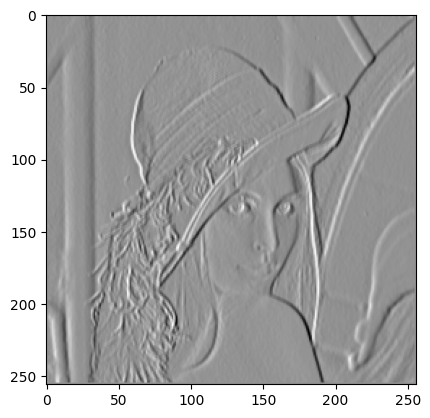

In [5]:
img1 = lena.copy()
prewitth = prewitt_h(img1)
plt.imshow(prewitth, 'gray')

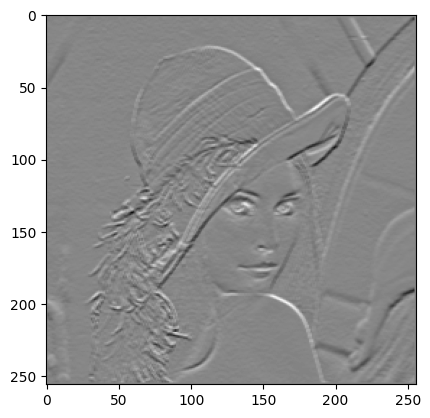

In [6]:
img2 = lena.copy()
prewittv = prewitt_v(img2)
plt.imshow(prewittv, 'gray')

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

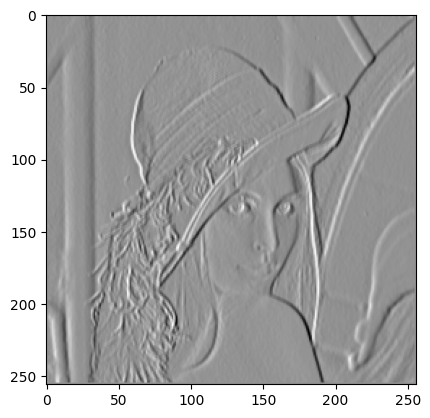

In [7]:
prewitthog = skimage.io.imread('data/lena_prewitt_h.tiff')
plt.imshow(prewitthog, 'gray')

In [8]:
assert numpy.allclose(prewitth, prewitthog, atol=1/255)

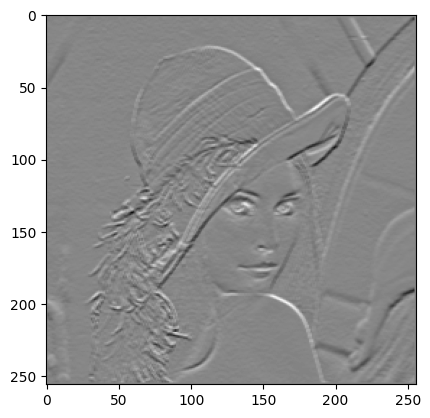

In [9]:
prewittvog = skimage.io.imread('data/lena_prewitt_v.tiff')
plt.imshow(prewittvog, 'gray')

In [10]:
assert numpy.allclose(prewittv, prewittvog, atol=1/255)


---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

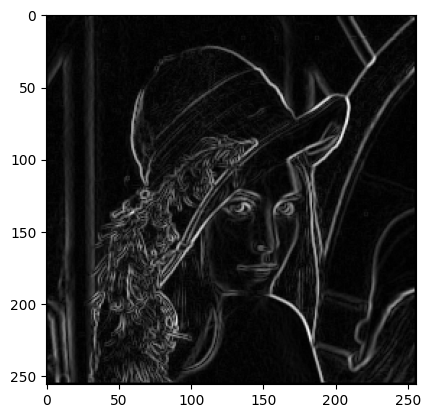

In [11]:
lenacopy = lena.copy()
magnitude_lena = numpy.sqrt(prewitt_h(lenacopy)**2 + prewitt_v(lenacopy)**2)
plt.imshow(magnitude_lena, 'gray')

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

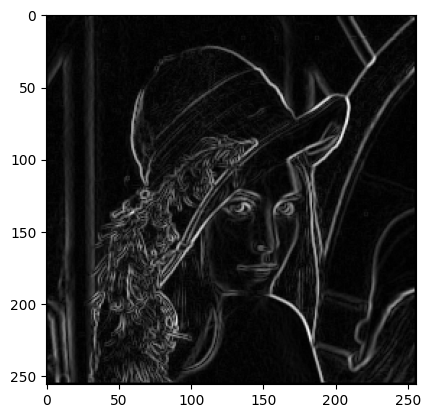

In [12]:
lenagradmag = skimage.io.imread('data/lena_prewitt_gradmag.tiff')
plt.imshow(lenagradmag, 'gray')

In [13]:
assert numpy.allclose(magnitude_lena, lenagradmag, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

In [14]:
def sobel_h(img):
   result = numpy.zeros(img.shape)
   filter = numpy.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])
   n = 1
   for p in numpy.ndindex(img.shape):
      if p[0] >= n and p[1] >= n and p[0] < img.shape[0] - n and p[1] < img.shape[1] - n:
         imgausschnitt = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1]
         result[p] = numpy.sum(filter*imgausschnitt)/8
   return result

def sobel_v(img):
   result = numpy.zeros(img.shape)
   filter = numpy.array([[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]])
   n = 1
   for p in numpy.ndindex(img.shape):
      if p[0] >= n and p[1] >= n and p[0] < img.shape[0] - n and p[1] < img.shape[1] - n:
         imgausschnitt = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1]
         result[p] = numpy.sum(filter*imgausschnitt)/8
   return result

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

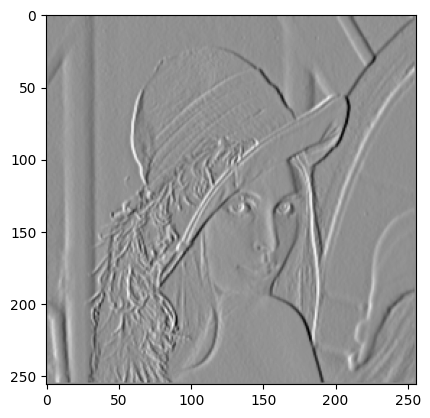

In [20]:
sobelhimg = sobel_h(lenacopy)
plt.imshow(sobelhimg, 'gray')

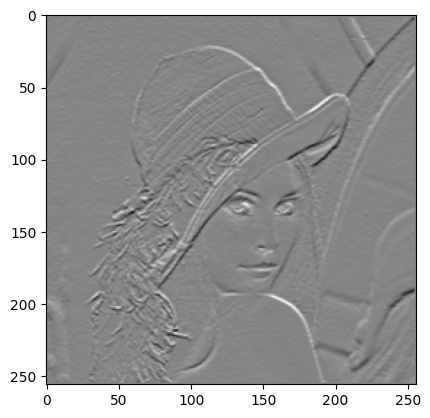

In [21]:
sobelvimg = sobel_v(lenacopy)
plt.imshow(sobelvimg, 'gray')

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`:

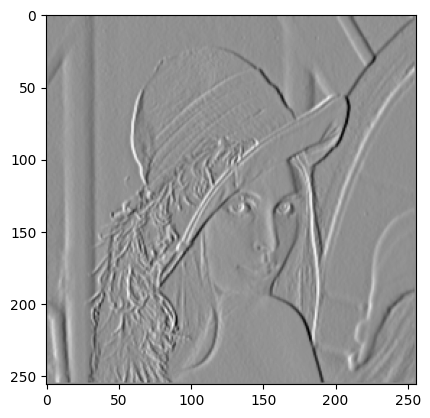

In [22]:
lenasobelh = skimage.io.imread('data/lena_sobel_h.tiff')
plt.imshow(lenasobelh, 'gray')

In [23]:
assert numpy.allclose(lenasobelh, sobelhimg, atol=1/255)

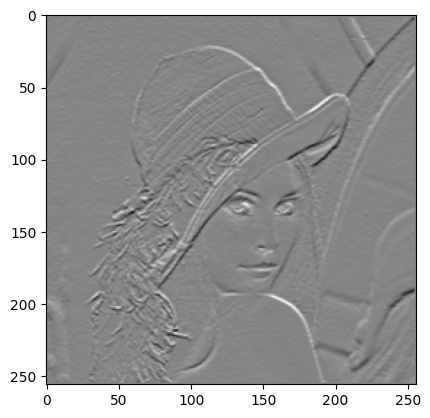

In [24]:
lenasobelv = skimage.io.imread('data/lena_sobel_v.tiff')
plt.imshow(lenasobelv, 'gray')

In [25]:
assert numpy.allclose(lenasobelv, sobelvimg, atol=1/255)

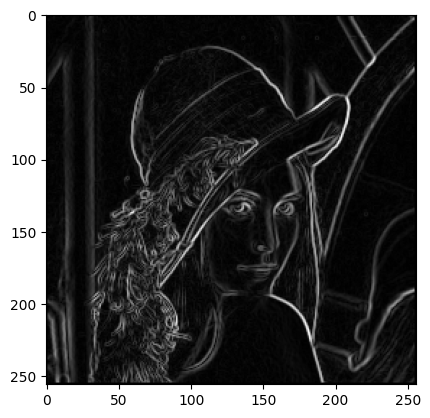

In [26]:
magsobel_lena = numpy.sqrt(sobel_h(lenacopy)**2 + sobel_v(lenacopy)**2)
plt.imshow(magsobel_lena, 'gray')